## Movie Recomendation System

## Part 0: Submission details

Name: James Birch
 
Date: 10/19/23

## Part 1: Why I choose it

I enjoy watching and learning about movies, but I can never decide what to watch. I have decided to use my new experience in machine learning to see if I can finally find out what to watch. I am also interested in seeming how recommender systems work. I see them every day and understand there is some sort of algorithm, but what goes into that? Also I need more practice visualizing data so that would be good.

## Part 2: Import Data

Import Libraries

In [1]:
import pandas as pd #for loading in csv files
import numpy as np # for array manipulation

Print Size of Dataframe

In [2]:
#function that finds the number of rows/records and columns/variables of a dataframe and print's them
#inputs: a dataframe
#return: none
def print_data_size(df):
    #use shape function to find dimensions of dataframe
    records, variables = df.shape
    #print dataframe name, then dimensions of dataframe
    print(df.name)
    print(f'This dataset has {records} records and {variables} variables')
    #print new line to make multiple prints easier to read
    print()
    return

MoviesLens 20M Dataset

In [3]:
# call functions to read csv files into dataframes from data files
# load in genome scores, rows are movies,columns are movie id, tag id, and relevance, store in dataframe
# set list of dataframes in movielens dataset
movies_20m_dfs = list()
gscores_20m_full = pd.read_csv('data/ml-20m/genome-scores.csv')
gscores_20m_full.name = "gscores_20m_full"
movies_20m_dfs.append(gscores_20m_full)
# load in genome tags, rows are tags,columns are tag ids and tags, store in dataframe
gtags_20m_full = pd.read_csv('data/ml-20m/genome-tags.csv')
gtags_20m_full.name = "gtags_20m_full"
movies_20m_dfs.append(gtags_20m_full)
# load in links/ ids, rows are movies,columns are movie id, imdb id, tmdb id, store in dataframe
links_20m_full = pd.read_csv('data/ml-20m/links.csv')
links_20m_full.name = "links_20m_full"
movies_20m_dfs.append(links_20m_full)
# load in movie names, rows are users,columns are movie id, movie name, and genre, store in dataframe
movies_20m_full = pd.read_csv('data/ml-20m/movies.csv')
movies_20m_full.name = "movies_20m_full"
movies_20m_dfs.append(movies_20m_full)
# load in user ratings, rows are movies,columns are user id, movie id, rating, and timestamp, store in dataframe
ratings_20m_full = pd.read_csv('data/ml-20m/ratings.csv')
ratings_20m_full.name = "ratings_20m_full"
movies_20m_dfs.append(ratings_20m_full)
# load in user tags, rows are users,columns are user id, movie id, tag, and timestamp, store in dataframe
tags_20m_full = pd.read_csv('data/ml-20m/tags.csv')
tags_20m_full.name = "tags_20m_full"
movies_20m_dfs.append(tags_20m_full)

#call function to print rows and columns of datasets
for df in movies_20m_dfs:
    print_data_size(df)

# I choose this dataset as it contains a large amount of data about users movie reviews from imdb.
# It has great documention, and has several variables that can be used with machine learning

gscores_20m_full
This dataset has 11709768 records and 3 variables

gtags_20m_full
This dataset has 1128 records and 2 variables

links_20m_full
This dataset has 27278 records and 3 variables

movies_20m_full
This dataset has 27278 records and 3 variables

ratings_20m_full
This dataset has 20000263 records and 4 variables

tags_20m_full
This dataset has 465564 records and 4 variables



In [4]:
# display datasets
for df in movies_20m_dfs:
    display(df.head())

movieId  tagId  relevance
0        1      1    0.02500
1        1      2    0.02500
2        1      3    0.05775
3        1      4    0.09675
4        1      5    0.14675

tagId           tag
0      1           007
1      2  007 (series)
2      3  18th century
3      4         1920s
4      5         1930s

movieId  imdbId   tmdbId
0        1  114709    862.0
1        2  113497   8844.0
2        3  113228  15602.0
3        4  114885  31357.0
4        5  113041  11862.0

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy

userId  movieId  rating   timestamp
0       1        2     3.5  1112486027
1       1       29     3.5  1112484676
2       1       32     3.5  1112484819
3       1       47     3.5  1112484727
4       1       50     3.5  1112484580

userId  movieId            tag   timestamp
0      18     4141    Mark Waters  1240597180
1      65      208      dark hero  1368150078
2      65      353      dark hero  1368150079
3      65      521  noir thriller  1368149983
4      65      592      dark hero  1368150078

TMDB Dataset

In [5]:
# call functions to read csv files into dataframes from data files
# set list of dataframes in tmdb dataset
tmdb_dfs = list()
# load in tmdb credits
credits_tmdb_full = pd.read_csv('data/tmdb_5000/tmdb_5000_credits.csv')
credits_tmdb_full.name = "credits_tmdb_full"
tmdb_dfs.append(credits_tmdb_full)
# load in tmdb
movies_tmdb_full = pd.read_csv('data/tmdb_5000/tmdb_5000_movies.csv')
movies_tmdb_full.name = "movies_tmdb_full"
tmdb_dfs.append(movies_tmdb_full)

#call function to print rows and columns of datasets
for df in tmdb_dfs:
    print_data_size(df)

# I choose this dataset as it contains a large amount of data about users movie reviews from "tmdb".
# It has great documention, and has several variables that can be used with machine learning
# It can also be used to look at the budgets and box office of films

credits_tmdb_full
This dataset has 4803 records and 4 variables

movies_tmdb_full
This dataset has 4803 records and 20 variables



In [6]:
#call function to print rows and columns of datasets
for df in tmdb_dfs:
    display(df.head())

movie_id                                     title  \
0     19995                                    Avatar   
1       285  Pirates of the Caribbean: At World's End   
2    206647                                   Spectre   
3     49026                     The Dark Knight Rises   
4     49529                               John Carter   

                                                cast  \
0  [{"cast_id": 242, "character": "Jake Sully", "...   
1  [{"cast_id": 4, "character": "Captain Jack Spa...   
2  [{"cast_id": 1, "character": "James Bond", "cr...   
3  [{"cast_id": 2, "character": "Bruce Wayne / Ba...   
4  [{"cast_id": 5, "character": "John Carter", "c...   

                                                crew  
0  [{"credit_id": "52fe48009251416c750aca23", "de...  
1  [{"credit_id": "52fe4232c3a36847f800b579", "de...  
2  [{"credit_id": "54805967c3a36829b5002c41", "de...  
3  [{"credit_id": "52fe4781c3a36847f81398c3", "de...  
4  [{"credit_id": "52fe479ac3a36847f813eaa3", "de...

budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   
3            http://www.thedarkknightrises.com/   49026   
4          http://movies.disney.com/john-carter   49529   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2  [{"id": 470, "name": "spy"}, {"id": 818, "name...                en   
3  [{"id": 849, "name": "dc comics"}, {"id": 853,...                en   
4  [{"id": 818, "name": "based on novel"}, {"id":...                en   

                             original_title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   
3                     The Dark Knight Rises   
4                               John Carter   

                                            overview  popularity  \
0  In the 22nd century, a paraplegic Marine is di...  150.437577   
1  Captain Barbossa, long believed to be dead, ha...  139.082615   
2  A cryptic message from Bond’s past sends him o...  107.376788   
3  Following the death of District Attorney Harve...  112.312950   
4  John Carter is a war-weary, former military ca...   43.926995   

                                production_companies  \
0  [{"name": "Ingenious Film Partners", "id": 289...   
1  [{"name": "Walt Disney Pictures", "id": 2}, {"...   
2  [{"name": "Columbia Pictures", "id": 5}, {"nam...   
3  [{"name": "Legendary Pictures", "id": 923}, {"...   
4        [{"name": "Walt Disney Pictures", "id": 2}]   

                                production_countries release_date     revenue  \
0  [{"iso_3166_1": "US", "name": "United States o...   2009-12-10  2787965087   
1  [{"iso_3166_1": "US", "name": "United States o...   2007-05-19   961000000   
2  [{"iso_3166_1": "GB", "name": "United Kingdom"...   2015-10-26   880674609   
3  [{"iso_3166_1": "US", "name": "United States o...   2012-07-16  1084939099   
4  [{"iso_3166_1": "US", "name": "United States o...   2012-03-07   284139100   

   runtime                                   spoken_languages    status  \
0    162.0  [{"iso_639_1": "en", "name": "English"}, {"iso...  Released   
1    169.0           [{"iso_639_1": "en", "name": "English"}]  Released   
2    148.0  [{"iso_639_1": "fr", "name": "Fran\u00e7ais"},...  Released   
3    165.0           [{"iso_639_1": "en", "name": "English"}]  Released   
4    132.0           [{"iso_639_1": "en", "name": "English"}]  Released   

                                          tagline  \
0                     Enter the World of Pandora.   
1  At the end of the world, the adventure begins.   
2                           A Plan No One Escapes   
3                                 The Legend Ends   
4            Lost in our world, found in another.   

                                      title  vote_average  vote_count  
0                                    Avatar           7.2       11800  
1  Pirates of the Caribbean: At World's End           6.9        4500  
2                                   Spectre           6.3        4466  
3                     The Dark Knight Rises           7.6        9106  
4                               John Carter           6.1        2124

The Movies Dataset

In [7]:
# call functions to read csv files into dataframes from data files
# set list of dataframes in the movies dataset
the_movies_dfs = list()
# load in credits
credits_md = pd.read_csv('data/the-movies-dataset/credits.csv')
credits_md.name = "credits_md"
the_movies_dfs.append(credits_md)
# load in keywords
keywords_md = pd.read_csv('data/the-movies-dataset/keywords.csv')
keywords_md.name = "keywords_md"
the_movies_dfs.append(keywords_md)
# load in links
links_md_full = pd.read_csv('data/the-movies-dataset/links.csv')
links_md_full.name = "links_md_full"
the_movies_dfs.append(links_md_full)
# load in part of links
links_md_part = pd.read_csv('data/the-movies-dataset/links_small.csv')
links_md_part.name= "links_md_part"
the_movies_dfs.append(links_md_part)
# load in movies metadata
metadata_md = pd.read_csv('data/the-movies-dataset/movies_metadata.csv')
metadata_md.name = "metadata_md"
the_movies_dfs.append(metadata_md)
# load in ratings
ratings_md_full = pd.read_csv('data/the-movies-dataset/ratings.csv')
ratings_md_full.name = "ratings_md_full"
the_movies_dfs.append(ratings_md_full)
# load in part of ratings
ratings_md_part = pd.read_csv('data/the-movies-dataset/ratings_small.csv')
ratings_md_part.name = "ratings_md_part"
the_movies_dfs.append(ratings_md_part)

#call function to print rows and columns of datasets
for df in the_movies_dfs:
    print_data_size(df)

# I choose this dataset as it contains a large amount of data about users movie reviews.
# It has great documention, and has several variables that can be used with machine learning
# It has a lot of similarities to the TMDB dataset

C:\Users\Owner\AppData\Local\Temp\ipykernel_27032\1214058829.py:21: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  metadata_md = pd.read_csv('data/the-movies-dataset/movies_metadata.csv')


credits_md
This dataset has 45476 records and 3 variables

keywords_md
This dataset has 46419 records and 2 variables

links_md_full
This dataset has 45843 records and 3 variables

links_md_part
This dataset has 9125 records and 3 variables

metadata_md
This dataset has 45466 records and 24 variables

ratings_md_full
This dataset has 26024289 records and 4 variables

ratings_md_part
This dataset has 100004 records and 4 variables



In [8]:
# print datasets in list
for df in the_movies_dfs:
    display(df.head())

cast  \
0  [{'cast_id': 14, 'character': 'Woody (voice)',...   
1  [{'cast_id': 1, 'character': 'Alan Parrish', '...   
2  [{'cast_id': 2, 'character': 'Max Goldman', 'c...   
3  [{'cast_id': 1, 'character': "Savannah 'Vannah...   
4  [{'cast_id': 1, 'character': 'George Banks', '...   

                                                crew     id  
0  [{'credit_id': '52fe4284c3a36847f8024f49', 'de...    862  
1  [{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...   8844  
2  [{'credit_id': '52fe466a9251416c75077a89', 'de...  15602  
3  [{'credit_id': '52fe44779251416c91011acb', 'de...  31357  
4  [{'credit_id': '52fe44959251416c75039ed7', 'de...  11862

id                                           keywords
0    862  [{'id': 931, 'name': 'jealousy'}, {'id': 4290,...
1   8844  [{'id': 10090, 'name': 'board game'}, {'id': 1...
2  15602  [{'id': 1495, 'name': 'fishing'}, {'id': 12392...
3  31357  [{'id': 818, 'name': 'based on novel'}, {'id':...
4  11862  [{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n...

movieId  imdbId   tmdbId
0        1  114709    862.0
1        2  113497   8844.0
2        3  113228  15602.0
3        4  114885  31357.0
4        5  113041  11862.0

movieId  imdbId   tmdbId
0        1  114709    862.0
1        2  113497   8844.0
2        3  113228  15602.0
3        4  114885  31357.0
4        5  113041  11862.0

adult                              belongs_to_collection    budget  \
0  False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
1  False                                                NaN  65000000   
2  False  {'id': 119050, 'name': 'Grumpy Old Men Collect...         0   
3  False                                                NaN  16000000   
4  False  {'id': 96871, 'name': 'Father of the Bride Col...         0   

                                              genres  \
0  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
1  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
2  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   
3  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
4                     [{'id': 35, 'name': 'Comedy'}]   

                               homepage     id    imdb_id original_language  \
0  http://toystory.disney.com/toy-story    862  tt0114709                en   
1                                   NaN   8844  tt0113497                en   
2                                   NaN  15602  tt0113228                en   
3                                   NaN  31357  tt0114885                en   
4                                   NaN  11862  tt0113041                en   

                original_title  \
0                    Toy Story   
1                      Jumanji   
2             Grumpier Old Men   
3            Waiting to Exhale   
4  Father of the Bride Part II   

                                            overview  ... release_date  \
0  Led by Woody, Andy's toys live happily in his ...  ...   1995-10-30   
1  When siblings Judy and Peter discover an encha...  ...   1995-12-15   
2  A family wedding reignites the ancient feud be...  ...   1995-12-22   
3  Cheated on, mistreated and stepped on, the wom...  ...   1995-12-22   
4  Just when George Banks has recovered from his ...  ...   1995-02-10   

       revenue runtime                                   spoken_languages  \
0  373554033.0    81.0           [{'iso_639_1': 'en', 'name': 'English'}]   
1  262797249.0   104.0  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...   
2          0.0   101.0           [{'iso_639_1': 'en', 'name': 'English'}]   
3   81452156.0   127.0           [{'iso_639_1': 'en', 'name': 'English'}]   
4   76578911.0   106.0           [{'iso_639_1': 'en', 'name': 'English'}]   

     status                                            tagline  \
0  Released                                                NaN   
1  Released          Roll the dice and unleash the excitement!   
2  Released  Still Yelling. Still Fighting. Still Ready for...   
3  Released  Friends are the people who let you be yourself...   
4  Released  Just When His World Is Back To Normal... He's ...   

                         title  video vote_average vote_count  
0                    Toy Story  False          7.7     5415.0  
1                      Jumanji  False          6.9     2413.0  
2             Grumpier Old Men  False          6.5       92.0  
3            Waiting to Exhale  False          6.1       34.0  
4  Father of the Bride Part II  False          5.7      173.0  

[5 rows x 24 columns]

userId  movieId  rating   timestamp
0       1      110     1.0  1425941529
1       1      147     4.5  1425942435
2       1      858     5.0  1425941523
3       1     1221     5.0  1425941546
4       1     1246     5.0  1425941556

userId  movieId  rating   timestamp
0       1       31     2.5  1260759144
1       1     1029     3.0  1260759179
2       1     1061     3.0  1260759182
3       1     1129     2.0  1260759185
4       1     1172     4.0  1260759205

## Part 3: Preparing the Data

Import Libraries

In [9]:
import sklearn.preprocessing
from sklearn.preprocessing import LabelEncoder

**Preparing MovieLens 20M Dataset**

**Cleaning**

Drop Duplicates

In [10]:
# function that removes duplicate rows and prints size of dataframe before and after
# parameters: dataframe
# returns: updated dataframe
def drop_duplicates(df):
    # print data size
    print_data_size(df)
    # drop duplicate rows
    df2 = df.drop_duplicates()
    # set name of dataset
    df2.name = df.name
    # print if size of dataset changed(duplicates were removed)
    if df2.shape[0] < df.shape[0]:
        print("Duplicates Removed:")
        print_data_size(df)
    
    return df2


Check for Missing Values

In [11]:
# function that returns number of missing values in column
# parameters: dataframe, column name
# returns: integer of missing values
def missing_data(df, c):
    #get null values of column in dataframe by given column name
    missing = df[c].isna().sum()
    return missing


Print Number of Null Values in Dataframe

In [12]:
# function that prints number of null values in columns of dataframe
# parameters: dataframe
# returns: list of columns with null values
def print_missing_data(df):
    null_col = []
    # get name of all columns in dataframe, assigns missing values to function call to missing data function taking
    # dataframe and column name as arguments, loop through all columns and print value returned for each column
    print(df.name)
    for column_name in df.columns:
        mv = missing_data(df, column_name)
        if mv > 0:
            print('Column', column_name, 'has', mv, 'missing value.')
            null_col.append(column_name)
        else:
            print('Column', column_name, 'has', mv, 'missing values.')
    print()
    return null_col

Drop rows with null values

In [13]:
# function that removes missing values in column of dataframe
# parameters: dataframe, column name
# returns: updated dataframe
def remove_missing_data(df, c):
    print('Before:')
    print_data_size(df)
    # print rows to be removed
    nan_index = df.index[df[c].isna()].tolist()
    for i in range(len(nan_index)):
        print('Removed row', nan_index[i])  
    # remove null values of column in dataframe by given column name
    df2 = df[df[c].notna()]
    # reset index of dataframe
    df2 = df2.reset_index(drop=True)
    
    df2.name = df.name
    print('After:')
    print_data_size(df2)
    
    return df2

**Selection**

Drop Irrelevant Columns

In [14]:
# function that removes unecessary columns from dataframe
# parameters: dataframe, column name
# returns: updated dataframe
def drop_column(df, c):
    df2 = df.drop(columns=[c])
    df2.name = df.name
    print(f'Column {c} removed')
    print_data_size(df2)
    
    return df2
    

**Manipulation**

Remove End Spaces

In [15]:
# function that removes space at end of string (used for space at end of split of title colum)
# parameters: string
# returns: updated string
def remove_end_spaces(string):
    return "".join(string.rstrip())


Normalize Movie Lens

In [16]:
# function that splits title column into title name and year
# parameters: dataframe
# returns: updated dataframe
def normalize_titles(df):
    # add year column from year in title string
    df['year']=df['title'].str.extract('.*\((.*)\).*')
    
    # remove year from title column
    for index, row in df.iterrows():
        new_title = row['title'].split('(')[0]
        # call function remove_end_spaces to remove space at end of row value
        new_title = remove_end_spaces(new_title)
        df.at[index,'title'] = new_title
    
    # set new dataframe with reordered columns
    final_df = df[['movieId','title','year','genres']]
    final_df.name = df.name
    
    return final_df


Normailze Ratings

In [17]:
# function that returns and prints min and max avalue in given dataframe column
# parameters: dataframe and column
# returns: min and max values in column as floats
def get_max_min(df, c):
    max_val = df[c].max()
    min_val = df[c].min()
    print(f"Max value of {c} column is {max_val}")
    print(f"Min value of {c} column is {min_val}\n")
    return max_val, min_val

Adjust Rating Scale

In [18]:
from sklearn.preprocessing import MinMaxScaler
# function that adjust rating scale of column to be out of 5 using z score normalization
# parameters: dataframe and column
# returns: updated dataframe
def adjust_ratings(df, c):
    adjusted_df = df.copy()
    adjusted_df.name = df.name
    # use minmax scaler to scale column
    scaler = MinMaxScaler()
    
    adjusted_df[c] = scaler.fit_transform(df[[c]])
    
    return adjusted_df
    

Add average ratings and number of ratings to dataframe

In [19]:
# function that adds average ratings and number of ratings for each movie
# parameters: dataframe
# returns: updated dataframe
def add_avg_and_num_ratings(df, df2):
    # get dataframe of average ratings of each movie
    temp_df1=df2.groupby('movieId').mean()['rating']
    # set column name to ratings
    temp_df2=pd.DataFrame(temp_df1, columns=['rating']).reset_index()
    # rename column to fit with other datasets
    temp_df2 = temp_df2.rename(columns = {"rating":"vote_average"})
    
    # get column of number of reviews for each movie by id
    temp_df3 = df2.groupby('movieId').count()['rating']
    # set column name to ratings
    temp_df4=pd.DataFrame(temp_df3, columns=['rating']).reset_index()
    # add number of ratings to other dataframe with name that is conisistent with other datasets
    temp_df2['vote_count'] = temp_df4['rating']
    
    # merge data frame with average rating
    temp_df5=pd.merge(df, temp_df2, on='movieId', how='left' )
    
    final_df = temp_df5.copy()
    
    return final_df


Grab only movies with N ratings

In [20]:
# function that grabs only users with n number of reviews
# parameters:  dataframe, int n
# returns: updated dataframe
def only_n_ratings(df, n):
    # get only users with n number of ratings
    x=df['userId'].value_counts()>n
    # get index of users
    y = x[x].index
    # update dataframe with only users with n ratings
    df2=df[df['userId'].isin(y)]
    df2.name = df.name
    
    return df2

Merge Ratings and Movies Dataframe

In [21]:
# function that merges movies dataframe and user ratings dataframe
# parameters:  merging dataframe
# returns: merged dataframe
def merge_user_ratings_and_movies(df, df2, n):
    # get ratings with 
    x=df2['userId'].value_counts()>n
    y = x[x].index
    df2=df2[df2['userId'].isin(y)]
    merged_df=df.merge(df2,on='movieId')
    
    
    return merged_df


In [22]:
# function that creates dataframe and list of genres of movies
# parameters:  dataframe
# returns: new dataframe and list
def make_genres_20m(df):
    # get data frame of unique genres from genre string in movies dataframe
    genres_unique = pd.DataFrame(df.genres.str.split('|').tolist()).stack().unique()
    genres_unique = pd.DataFrame(genres_unique, columns=['genre'])
        
    # create list of genres from genre dataframe for for loop
    genres_list = []
    for index, row in genres_unique.iterrows():
        genres_list.append(row['genre'])
    
    return genres_unique, genres_list


Convert to Datetime

In [23]:
# function that converts column to datetime where approriate
# parameters: dataframe and column
# returns: updated dataframe
def convert_to_datetime(df,c,t_unit):
    df[c] = pd.to_datetime(df[c], unit = t_unit)

    return df


Prepare MovieLens Dataset

In [24]:
# function that prepares MovieLens 20m Data by calling cleaning functions
# parameters: dataframes from MovieLens Dataset
# returns: updated dataframes from MovieLens Dataset and new ones
def prepare_20m_data(gscores, gtags, links, movies, ratings, tags):
    
    # reset names of dataframes
    gscores.name = 'gscores_20m'
    gtags.name = 'gtags_20m'
    links.name = 'links_20m'
    movies.name = 'movies_20m'
    ratings.name = 'ratings_20m'
    tags.name = 'tags_20m'
    
    # remove duplicates
    gscores = drop_duplicates(gscores)
    gtags = drop_duplicates(gtags)
    links = drop_duplicates(links)
    movies = drop_duplicates(movies)
    ratings = drop_duplicates(ratings)
    tags = drop_duplicates(tags)
    
    # print columns with null values and stores them in a list
    print("Movies 20m Dataset:\n")
    gscores_null = print_missing_data(gscores)
    gtags_null = print_missing_data(gtags)
    links_null = print_missing_data(links)
    movies_null = print_missing_data(movies)
    ratings_null = print_missing_data(ratings)
    tags_null  = print_missing_data(tags)
    
    # remove rows with null values
    # no relavent null rows so function is not called
    
    # convert timestamp column to date time
    ratings = convert_to_datetime(ratings, 'timestamp', 's')
    
    # check if ratings need to be adjusted
    max_rating, min_rating = get_max_min(ratings, 'rating')
    
    # no adjustment needed
    
    # normalize movie titles
    movies = normalize_titles(movies)
    
    # remove irrelavent columns 
    ratings = drop_column(ratings, 'timestamp')
    
    # add average rating and num ratings for movies
    movies_plus_avg_ratings = add_avg_and_num_ratings(movies, ratings)
    movies_plus_avg_ratings.name = 'movies_avg_20m'
    
    display(movies_plus_avg_ratings.head())
    
    # add user ratings to movies dataframe
    movies_plus_usr_ratings = merge_user_ratings_and_movies(movies, ratings, 500)
    movies_plus_usr_ratings.name = 'movies_usr_20m'
    display(movies_plus_usr_ratings.head())
    
    # get dataframe and list of generes
    genres, genres_list = make_genres_20m(movies)
    display(genres.head())
    
    return gscores, gtags, links, movies, ratings, tags, movies_plus_avg_ratings, movies_plus_usr_ratings, genres, genres_list
    

Call Function to Prepare MovieLens 20M Dataset

In [25]:
gscores_20m, gtags_20m, links_20m, movies_20m, ratings_20m, tags_20m, movies_avg_20m, movies_usr_20m, genres_20m\
,genres_20m_list = prepare_20m_data(gscores_20m_full, gtags_20m_full, links_20m_full, movies_20m_full, ratings_20m_full, tags_20m_full)

gscores_20m
This dataset has 11709768 records and 3 variables

gtags_20m
This dataset has 1128 records and 2 variables

links_20m
This dataset has 27278 records and 3 variables

movies_20m
This dataset has 27278 records and 3 variables

ratings_20m
This dataset has 20000263 records and 4 variables

tags_20m
This dataset has 465564 records and 4 variables

Movies 20m Dataset:

gscores_20m
Column movieId has 0 missing values.
Column tagId has 0 missing values.
Column relevance has 0 missing values.

gtags_20m
Column tagId has 0 missing values.
Column tag has 0 missing values.

links_20m
Column movieId has 0 missing values.
Column imdbId has 0 missing values.
Column tmdbId has 252 missing value.

movies_20m
Column movieId has 0 missing values.
Column title has 0 missing values.
Column genres has 0 missing values.

ratings_20m
Column userId has 0 missing values.
Column movieId has 0 missing values.
Column rating has 0 missing values.
Column timestamp has 0 missing values.

tags_20m
Column 

movieId                        title  year  \
0        1                    Toy Story  1995   
1        2                      Jumanji  1995   
2        3             Grumpier Old Men  1995   
3        4            Waiting to Exhale  1995   
4        5  Father of the Bride Part II  1995   

                                        genres  vote_average  vote_count  
0  Adventure|Animation|Children|Comedy|Fantasy      3.921240     49695.0  
1                   Adventure|Children|Fantasy      3.211977     22243.0  
2                               Comedy|Romance      3.151040     12735.0  
3                         Comedy|Drama|Romance      2.861393      2756.0  
4                                       Comedy      3.064592     12161.0

movieId      title  year                                       genres  \
0        1  Toy Story  1995  Adventure|Animation|Children|Comedy|Fantasy   
1        1  Toy Story  1995  Adventure|Animation|Children|Comedy|Fantasy   
2        1  Toy Story  1995  Adventure|Animation|Children|Comedy|Fantasy   
3        1  Toy Story  1995  Adventure|Animation|Children|Comedy|Fantasy   
4        1  Toy Story  1995  Adventure|Animation|Children|Comedy|Fantasy   

   userId  rating  
0      11     4.5  
1      24     4.0  
2      54     4.0  
3      58     5.0  
4      91     4.0

genre
0  Adventure
1  Animation
2   Children
3     Comedy
4    Fantasy

**Preparing TMDB 5000 Dataset**

**Cleaning**

Drop dublicates of columns with list elements

In [26]:
# function that removes duplicate rows if dataframe has list
# parameters: dataframe
# returns: updated dataframe
def drop_duplicates_w_list(df):
    list_col = []
    df2 = df.copy()
    df2[0].apply(tuple, 1).drop_duplicates().apply(list).to_frame()
    df2.name = df.name
    return df2


Convert columns with json elements

In [27]:
import json
# function that converts columns with json values
# parameters: dataframe and list of columns with json values
# returns: updated dataframe
def convert_json_col(df, jcol):
    # print size
    print_data_size(df)
    
    # load jsons for list of columns
    for c in jcol:
        # changing the genres column from json to string
        df[c]=df[c].apply(json.loads)
        for index,i in zip(df.index,df[c]):
            list1=[]
            for j in range(len(i)):
                list1.append((i[j]['name']).lower())
            df.loc[index,c]=str(list1)
    
    # print size
    print_data_size(df)
    
    return df


Get director from crew column

In [28]:
# function that gets director from json of crew column
# parameters: json string from dataframe column
# returns: director name
def director(x):
    l = []
    for i in x:
        #grab job labled as director and return as list containing director name
        if i['job'] == 'Director':
            l.append((i['name']).lower())
            return l


Convert json columns of credits Dataframe

In [29]:
# function converts json columns of credits dataframe
# parameters: dataframe
# returns: updated dataframe
def convert_credits(df):
    # apply json loads to cast column
    df['cast']= df['cast'].apply(json.loads)
    # turn result into list
    for index,i in zip(df.index,df['cast']):
        list1=[]
        for j in range(len(i)):
            list1.append((i[j]['name']).lower())
        df.loc[index,'cast']=str(list1) 
    # apply json loads to cast column
    df['crew']=df['crew'].apply(json.loads)
    # send row of each column to director function to get only director name
    df['crew']=df['crew'].apply(director)
    # change column name crew to director
    df.rename(columns={'crew':'director'},inplace=True)
    
    return df


Split list elements

In [30]:
# function splits list in column
# parameters: dataframe, column
# returns: updated dataframe
def split_list(df, c):
    # turns lists into strings
    df[c]=df[c].str.strip('[]').str.replace(' ','').str.replace("'",'')
    df[c]=df[c].str.split(',')
    
    return df


Combine columns

In [31]:
# function combines existing columns into new column
# parameters: dataframe, list of columns, new column name
# returns: updated dataframe
def combine_col(df, clist, cName):
    df[cName] = df[clist[0]]
    clist.pop(0)
    for c in clist:
        print(c)
        df[cName] = df[cName] + df[c]
        
    display(df.head())
    return df


Prepare TMDB 5000 Dataset

In [32]:
# function that prepares TMDB Data by calling cleaning functions
# parameters: dataframes from TMDB Dataset
# returns: updated dataframes from TMDB Dataset and new ones
def prepare_tmdb(credits, movies):
    # reset names of dataframes
    credits.name = 'credits_tmdb'
    movies.name = 'movies_tmdb'
    
    # print columns with null values and stores them in a list
    print("TMDB 5000 Dataset:\n")
    credits_null = print_missing_data(credits)
    movies_null = print_missing_data(movies)
    
    # remove rows with relavent missing data
    movies = remove_missing_data(movies, 'overview')
    movies_null = print_missing_data(movies)
    
    # convert json columns
    movies_jcol = ['genres', 'keywords', 'production_countries','production_companies', 'spoken_languages']
    movies = convert_json_col(movies, movies_jcol)
    credits = convert_credits(credits)
    # split json lists
    for c in movies_jcol:
        movies = split_list(movies, c)
    credits = split_list(credits, 'cast')
    movies['overview'] = movies['overview'].apply(lambda x:x.lower())
    movies['overview'] = movies['overview'].apply(lambda x : x.split())
    
    # check if ratings need to be adjusted
    max_rating, min_rating = get_max_min(movies, 'vote_average')
    
    # merge datasets 
    movies_merge = movies.merge(credits,on='title')
    
    display(movies_merge.head())
    
    # combine columns from lists into one new column
    tag_list = ['overview','genres','keywords','cast','director']
    movies_merge = combine_col(movies_merge, tag_list, 'tags')
    # extract strings from lists
    movies_merge['tags'] = movies_merge['tags'].apply(lambda x :" ".join(map(str, x)) if isinstance(x, (list, tuple)) else str(x))
    # remove irrelavent columns
    movies_tags = movies_merge[['movie_id','title','tags']]
    movies_tags.name = 'movies_tags'
    
    # make new ataframe with vote average for visualization
    movies_tags_avg = movies_merge[['movie_id','title','tags', 'vote_average']]
    movies_tags_avg.name = 'movies_tags_avg'
    display(movies_tags.head())
    
    
    return movies, credits, movies_tags, movies_merge, movies_tags_avg


Send Data to be Prepared

In [33]:
movies_tmdb, credits_tmdb, movies_tags_tmdb, movies_merge_tmdb, movies_tags_avg_tmdb = prepare_tmdb(credits_tmdb_full, movies_tmdb_full)

TMDB 5000 Dataset:

credits_tmdb
Column movie_id has 0 missing values.
Column title has 0 missing values.
Column cast has 0 missing values.
Column crew has 0 missing values.

movies_tmdb
Column budget has 0 missing values.
Column genres has 0 missing values.
Column homepage has 3091 missing value.
Column id has 0 missing values.
Column keywords has 0 missing values.
Column original_language has 0 missing values.
Column original_title has 0 missing values.
Column overview has 3 missing value.
Column popularity has 0 missing values.
Column production_companies has 0 missing values.
Column production_countries has 0 missing values.
Column release_date has 1 missing value.
Column revenue has 0 missing values.
Column runtime has 2 missing value.
Column spoken_languages has 0 missing values.
Column status has 0 missing values.
Column tagline has 844 missing value.
Column title has 0 missing values.
Column vote_average has 0 missing values.
Column vote_count has 0 missing values.

Before:
mov

budget                                        genres  \
0  237000000  [action, adventure, fantasy, sciencefiction]   
1  300000000                  [adventure, fantasy, action]   
2  245000000                    [action, adventure, crime]   
3  250000000              [action, crime, drama, thriller]   
4  260000000           [action, adventure, sciencefiction]   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   
3            http://www.thedarkknightrises.com/   49026   
4          http://movies.disney.com/john-carter   49529   

                                            keywords original_language  \
0  [cultureclash, future, spacewar, spacecolony, ...                en   
1  [ocean, drugabuse, exoticisland, eastindiatrad...                en   
2  [spy, basedonnovel, secretagent, sequel, mi6, ...                en   
3  [dccomics, crimefighter, terrorist, secretiden...                en   
4  [basedonnovel, mars, medallion, spacetravel, p...                en   

                             original_title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   
3                     The Dark Knight Rises   
4                               John Carter   

                                            overview  popularity  \
0  [in, the, 22nd, century,, a, paraplegic, marin...  150.437577   
1  [captain, barbossa,, long, believed, to, be, d...  139.082615   
2  [a, cryptic, message, from, bond’s, past, send...  107.376788   
3  [following, the, death, of, district, attorney...  112.312950   
4  [john, carter, is, a, war-weary,, former, mili...   43.926995   

                                production_companies  ... runtime  \
0  [ingeniousfilmpartners, twentiethcenturyfoxfil...  ...   162.0   
1  [waltdisneypictures, jerrybruckheimerfilms, se...  ...   169.0   
2                    [columbiapictures, danjaq, b24]  ...   148.0   
3  [legendarypictures, warnerbros., dcentertainme...  ...   165.0   
4                               [waltdisneypictures]  ...   132.0   

                                  spoken_languages    status  \
0                               [english, español]  Released   
1                                        [english]  Released   
2  [français, english, español, italiano, deutsch]  Released   
3                                        [english]  Released   
4                                        [english]  Released   

                                          tagline  \
0                     Enter the World of Pandora.   
1  At the end of the world, the adventure begins.   
2                           A Plan No One Escapes   
3                                 The Legend Ends   
4            Lost in our world, found in another.   

                                      title vote_average vote_count movie_id  \
0                                    Avatar          7.2      11800    19995   
1  Pirates of the Caribbean: At World's End          6.9       4500      285   
2                                   Spectre          6.3       4466   206647   
3                     The Dark Knight Rises          7.6       9106    49026   
4                               John Carter          6.1       2124    49529   

                                                cast             director  
0  [samworthington, zoesaldana, sigourneyweaver, ...      [james cameron]  
1  [johnnydepp, orlandobloom, keiraknightley, ste...     [gore verbinski]  
2  [danielcraig, christophwaltz, léaseydoux, ralp...         [sam mendes]  
3  [christianbale, michaelcaine, garyoldman, anne...  [christopher nolan]  
4  [taylorkitsch, lynncollins, samanthamorton, wi...     [andrew stanton]  

[5 rows x 23 columns]

genres
keywords
cast
director


budget                                        genres  \
0  237000000  [action, adventure, fantasy, sciencefiction]   
1  300000000                  [adventure, fantasy, action]   
2  245000000                    [action, adventure, crime]   
3  250000000              [action, crime, drama, thriller]   
4  260000000           [action, adventure, sciencefiction]   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   
3            http://www.thedarkknightrises.com/   49026   
4          http://movies.disney.com/john-carter   49529   

                                            keywords original_language  \
0  [cultureclash, future, spacewar, spacecolony, ...                en   
1  [ocean, drugabuse, exoticisland, eastindiatrad...                en   
2  [spy, basedonnovel, secretagent, sequel, mi6, ...                en   
3  [dccomics, crimefighter, terrorist, secretiden...                en   
4  [basedonnovel, mars, medallion, spacetravel, p...                en   

                             original_title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   
3                     The Dark Knight Rises   
4                               John Carter   

                                            overview  popularity  \
0  [in, the, 22nd, century,, a, paraplegic, marin...  150.437577   
1  [captain, barbossa,, long, believed, to, be, d...  139.082615   
2  [a, cryptic, message, from, bond’s, past, send...  107.376788   
3  [following, the, death, of, district, attorney...  112.312950   
4  [john, carter, is, a, war-weary,, former, mili...   43.926995   

                                production_companies  ...  \
0  [ingeniousfilmpartners, twentiethcenturyfoxfil...  ...   
1  [waltdisneypictures, jerrybruckheimerfilms, se...  ...   
2                    [columbiapictures, danjaq, b24]  ...   
3  [legendarypictures, warnerbros., dcentertainme...  ...   
4                               [waltdisneypictures]  ...   

                                  spoken_languages    status  \
0                               [english, español]  Released   
1                                        [english]  Released   
2  [français, english, español, italiano, deutsch]  Released   
3                                        [english]  Released   
4                                        [english]  Released   

                                          tagline  \
0                     Enter the World of Pandora.   
1  At the end of the world, the adventure begins.   
2                           A Plan No One Escapes   
3                                 The Legend Ends   
4            Lost in our world, found in another.   

                                      title vote_average vote_count movie_id  \
0                                    Avatar          7.2      11800    19995   
1  Pirates of the Caribbean: At World's End          6.9       4500      285   
2                                   Spectre          6.3       4466   206647   
3                     The Dark Knight Rises          7.6       9106    49026   
4                               John Carter          6.1       2124    49529   

                                                cast             director  \
0  [samworthington, zoesaldana, sigourneyweaver, ...      [james cameron]   
1  [johnnydepp, orlandobloom, keiraknightley, ste...     [gore verbinski]   
2  [danielcraig, christophwaltz, léaseydoux, ralp...         [sam mendes]   
3  [christianbale, michaelcaine, garyoldman, anne...  [christopher nolan]   
4  [taylorkitsch, lynncollins, samanthamorton, wi...     [andrew stanton]   

                                                tags  
0  [in, the, 22nd, century,, a, paraplegic, marin...  
1  [captain, bar

movie_id                                     title  \
0     19995                                    Avatar   
1       285  Pirates of the Caribbean: At World's End   
2    206647                                   Spectre   
3     49026                     The Dark Knight Rises   
4     49529                               John Carter   

                                                tags  
0  in the 22nd century, a paraplegic marine is di...  
1  captain barbossa, long believed to be dead, ha...  
2  a cryptic message from bond’s past sends him o...  
3  following the death of district attorney harve...  
4  john carter is a war-weary, former military ca...

**Preparing the Movies Dataset**

Convert JSON

In [34]:
from ast import literal_eval
# function that converts columns with json values
# parameters: dataframe and list of columns with json values
# returns: updated dataframe
def the_convert_json_col(df, jcol):
    # print size
    print_data_size(df)
    
    # load jsons for list of columns
    for c in jcol:
        # changing the genres column from json to string
        df[c]=df[c].apply(literal_eval)
        for index,i in zip(df.index,df[c]):
            list1=[]
            for j in range(len(i)):
                list1.append((i[j]['name']))
            df.loc[index,c]=str(list1)
    
    # print size
    print_data_size(df)
    
    return df


Convert Credits Dataframe

In [35]:
# function converts json columns of credits dataframe
# parameters: dataframe
# returns: updated dataframe
def the_convert_credits(df):
    df['cast']= df['cast'].apply(literal_eval)
    for index,i in zip(df.index,df['cast']):
        list1=[]
        for j in range(len(i)):
            list1.append((i[j]['name']))
        df.loc[index,'cast']=str(list1) 
    df['crew']=df['crew'].apply(literal_eval)
    df['crew']=df['crew'].apply(director)
    df.rename(columns={'crew':'director'},inplace=True)
    
    return df


Convert Column to int if possible

In [36]:
# convert dataframe column to integers if possible
# parameters: dataframe, column name
# returns: updated dataframe
def convert_int(df,c):
    for row in df[c]:
        #if no error, turn to int, otherwise set to nan to be removed later
        try:
            row = row.astype(int)
        except AttributeError:
            row = np.NaN 
    
    return df


Define Countries

In [37]:
# function that gets country name from json of production countries column
# parameters: json string from dataframe column
# returns: country name
def country(x):
    # if element is list, return country name
    l = []
    for i in x:
        if isinstance(x, list):
            l.append(i['name'])
        return l
    # if not, return empty list
    else:
        return []
    

Get Dataframe of Countries and Number of Movies filmed in them

In [38]:
# function creates dataframe of country names and number of occurrances
# parameters: dataframe
# returns: new dataframe    
def get_num_movies_per_country(df):
    # remove empty lists
    df = df[df['production_countries'].map(lambda d: len(d)) > 0]
    # get strings from list
    df = split_list(df, 'production_countries')
    # get dataframe of countries
    df_c = df.apply(lambda x: pd.Series(x['production_countries']),axis=1).stack().reset_index(level=1, drop=True)
    df_c.name = 'countries'
    df2 = df.drop('production_countries', axis=1).join(df_c)
    # get count of movies produced in each county and add to dataframe
    df2 = pd.DataFrame(df2['countries'].value_counts())
    df2['country'] = df2.index
    # reset column names and index
    df2.columns = ['movies_count', 'country_name']
    df2 = df2.reset_index(drop=True)
    
    return df2

Prepare The Movies Dataset

In [39]:
# function that prepares the Movies Data by calling cleaning functions
# parameters: dataframes from The Movies Dataset
# returns: updated dataframes from The Movies Dataset and more
def prepare_the_movies(credits, keywords, links_big, links_small, metadata, ratings_big, ratings_small):
    # reset names of dataframes
    credits.name = 'the_credits'
    keywords.name = 'the_keywords'
    links_big.name = 'the_links_big'
    links_small.name = 'the_links_small'
    metadata.name = 'the_metadata'
    ratings_big.name = 'the_ratings_big'
    ratings_small.name = 'the_ratings_small'
    
     # print columns with null values and stores them in a list
    print("The Movies Dataset:\n")
    credits_null = print_missing_data(credits)
    keywords_null = print_missing_data(keywords)
    links_big_null = print_missing_data(links_big)
    links_small_null = print_missing_data(links_small)
    metadata_null = print_missing_data(metadata)
    ratings_big_null  = print_missing_data(ratings_big)
    ratings_small_null  = print_missing_data(ratings_small)
    
    # rename id column to be consistent with other datasets
    credits.rename(columns={'id':'movieId'},inplace=True)
    keywords.rename(columns={'id':'movieId'},inplace=True)
    metadata.rename(columns={'id':'movieId'},inplace=True)
    
    # drop inccorecctly formated ids (date format)
    metadata.drop(metadata.index[19730],inplace=True)
    metadata.drop(metadata.index[29502],inplace=True)
    metadata.drop(metadata.index[35585],inplace=True)
    metadata.movieId = metadata.movieId.astype(np.int64)
    
    # remove id's that weren't ints
    metadata = remove_missing_data(metadata, 'movieId')
    #metadata = remove_missing_data(metadata, 'id')
    metadata_null = print_missing_data(metadata)
    
    # convert missing country data to empty lists
    metadata['production_countries'] = metadata['production_countries'].fillna('[]')
    
    # convert json columns
    metadata_jcol = ['genres', 'production_countries']
    metadata = the_convert_json_col(metadata, metadata_jcol)
    credits = the_convert_credits(credits)
    
    # split json lists
    metadata['prodcution_countries'] = metadata['production_countries'].apply(country)
    metadata = split_list(metadata, 'genres')
    credits = split_list(credits, 'cast')
    
    # convert json columns
    keywords_jcol = ['keywords']
    keywords = the_convert_json_col(keywords, keywords_jcol)
    # split json lists
    for c in keywords_jcol:
        keywords = split_list(keywords, c)
        
    # remove duplicates
    credits.drop_duplicates('movieId', inplace = True)
    keywords.drop_duplicates('movieId', inplace = True)
    metadata.drop_duplicates('movieId', inplace = True)
    links_big = drop_duplicates(links_big)
    links_small = drop_duplicates(links_small)
    ratings_big = drop_duplicates(ratings_big)
    ratings_small = drop_duplicates(ratings_small)
    
    # set ratings dataframe (big or small)
    ratings = ratings_big.copy()
    ratings.name = 'ratings'
    
    # remove rows with null values
    # no relavent null rows so function is not called
    
    # convert timestamp column to date time
    ratings = convert_to_datetime(ratings, 'timestamp', 's')
    
    # check if ratings need to be adjusted
    max_rating, min_rating = get_max_min(ratings, 'rating')
    
    # no adjustment needed
    
    # remove irrelavent columns 
    ratings = drop_column(ratings, 'timestamp')
    display(metadata.head())
    # add user ratings to movies dataframe
    #metadata_rel = metadata[['id', 'title']]
    metadata_rel = metadata[['movieId', 'title']]
    
    # merge metadata and user ratings dataframes
    metadata_usr_ratings = merge_user_ratings_and_movies(metadata_rel, ratings, 20)
    
    # remove duplicates
    if not metadata_usr_ratings[metadata_usr_ratings.duplicated(['userId','title'])].empty:
        metadata_usr_ratings = metadata_usr_ratings.drop_duplicates(['userId','title'])
        
    metadata_usr_ratings.name = 'the_metadata_usr_ratings'
    display(metadata_usr_ratings.head())
    print_data_size(metadata_usr_ratings)
    
    # get dataframe of countries and number of movies made in those countries
    metadata_countries = get_num_movies_per_country(metadata)
    # extract strings from list
    metadata_countries['country_name'] = metadata_countries['country_name'].apply(lambda x :" ".join(map(str, x)) if isinstance(x, (list, tuple)) else str(x))
    # drop empty country row
    metadata_countries.drop(1, inplace=True)
    metadata_countries.reset_index(drop=True)
    # remove US from list as it is a massive outlier
    metadata_countries = metadata_countries[metadata_countries['country_name'] != 'UnitedStatesofAmerica']
    metadata_countries.reset_index(drop=True)
    
    metadata_countries.name = 'metadata_countries'
    display(metadata_countries.head())
    
    
    return credits, keywords, links_big, links_small, metadata, ratings_big, ratings_small, metadata_usr_ratings, metadata_countries


In [40]:
credits_md, keywords_md, links_md_full, links_md_part, metadata_md, ratings_md_full, ratings_md_part, metadata_usr_ratings, metadata_countries\
= prepare_the_movies(credits_md, keywords_md, links_md_full, links_md_part, metadata_md, ratings_md_full, ratings_md_part)

The Movies Dataset:

the_credits
Column cast has 0 missing values.
Column crew has 0 missing values.
Column id has 0 missing values.

the_keywords
Column id has 0 missing values.
Column keywords has 0 missing values.

the_links_big
Column movieId has 0 missing values.
Column imdbId has 0 missing values.
Column tmdbId has 219 missing value.

the_links_small
Column movieId has 0 missing values.
Column imdbId has 0 missing values.
Column tmdbId has 13 missing value.

the_metadata
Column adult has 0 missing values.
Column belongs_to_collection has 40972 missing value.
Column budget has 0 missing values.
Column genres has 0 missing values.
Column homepage has 37684 missing value.
Column id has 0 missing values.
Column imdb_id has 17 missing value.
Column original_language has 11 missing value.
Column original_title has 0 missing values.
Column overview has 954 missing value.
Column popularity has 5 missing value.
Column poster_path has 386 missing value.
Column production_companies has 3 mi

adult                              belongs_to_collection    budget  \
0  False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
1  False                                                NaN  65000000   
2  False  {'id': 119050, 'name': 'Grumpy Old Men Collect...         0   
3  False                                                NaN  16000000   
4  False  {'id': 96871, 'name': 'Father of the Bride Col...         0   

                         genres                              homepage  \
0   [Animation, Comedy, Family]  http://toystory.disney.com/toy-story   
1  [Adventure, Fantasy, Family]                                   NaN   
2             [Romance, Comedy]                                   NaN   
3      [Comedy, Drama, Romance]                                   NaN   
4                      [Comedy]                                   NaN   

   movieId    imdb_id original_language               original_title  \
0      862  tt0114709                en                    Toy Story   
1     8844  tt0113497                en                      Jumanji   
2    15602  tt0113228                en             Grumpier Old Men   
3    31357  tt0114885                en            Waiting to Exhale   
4    11862  tt0113041                en  Father of the Bride Part II   

                                            overview  ...      revenue  \
0  Led by Woody, Andy's toys live happily in his ...  ...  373554033.0   
1  When siblings Judy and Peter discover an encha...  ...  262797249.0   
2  A family wedding reignites the ancient feud be...  ...          0.0   
3  Cheated on, mistreated and stepped on, the wom...  ...   81452156.0   
4  Just when George Banks has recovered from his ...  ...   76578911.0   

  runtime                                   spoken_languages    status  \
0    81.0           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
1   104.0  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...  Released   
2   101.0           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
3   127.0           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
4   106.0           [{'iso_639_1': 'en', 'name': 'English'}]  Released   

                                             tagline  \
0                                                NaN   
1          Roll the dice and unleash the excitement!   
2  Still Yelling. Still Fighting. Still Ready for...   
3  Friends are the people who let you be yourself...   
4  Just When His World Is Back To Normal... He's ...   

                         title  video vote_average vote_count  \
0                    Toy Story  False          7.7     5415.0   
1                      Jumanji  False          6.9     2413.0   
2             Grumpier Old Men  False          6.5       92.0   
3            Waiting to Exhale  False          6.1       34.0   
4  Father of the Bride Part II  False          5.7      173.0   

  prodcution_countries  
0                   []  
1                   []  
2                   []  
3                   []  
4                   []  

[5 rows x 25 columns]

movieId      title  userId  rating
0      862  Toy Story    1923     3.0
1      862  Toy Story    2103     5.0
2      862  Toy Story    5380     1.0
3      862  Toy Story    6177     4.0
4      862  Toy Story    6525     4.0

the_metadata_usr_ratings
This dataset has 10735126 records and 4 variables



movies_count   country_name
2          4091  UnitedKingdom
3          3932         France
4          2249        Germany
5          2166          Italy
6          1765         Canada

## Part 4: Visualization

In [41]:
import matplotlib.pyplot as plt # for plots
import seaborn as sns # for plots
from collections import Counter # for counting

Number of Movies in each genre per year

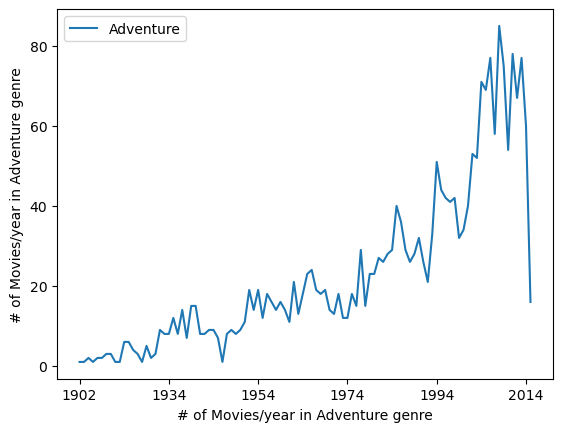

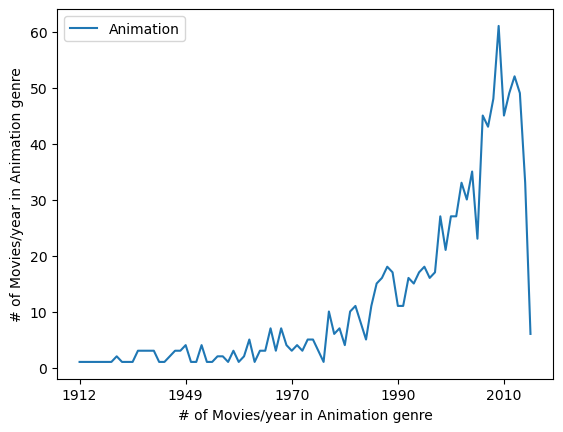

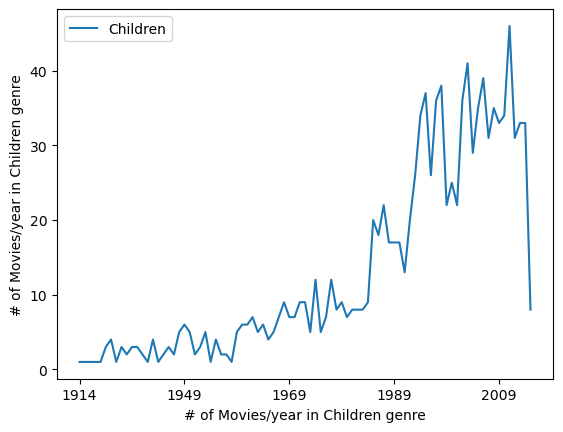

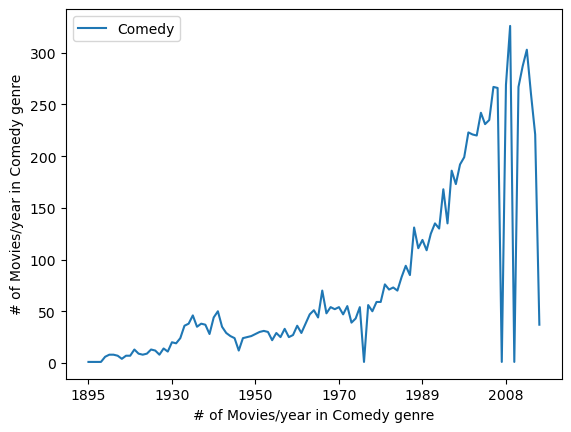

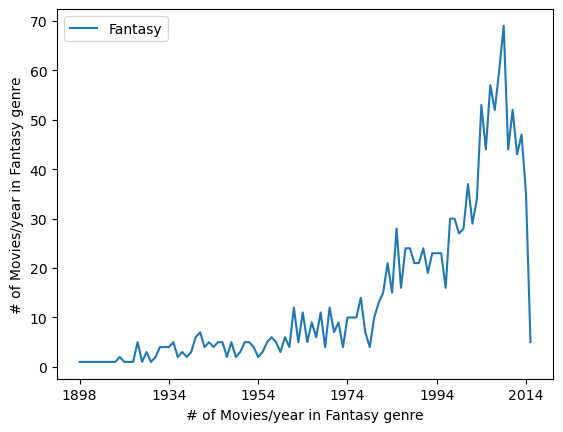

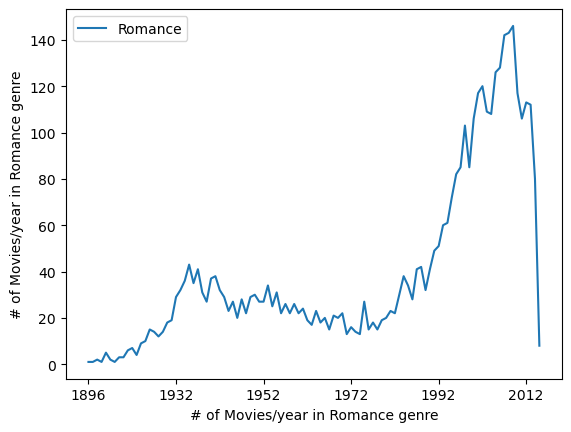

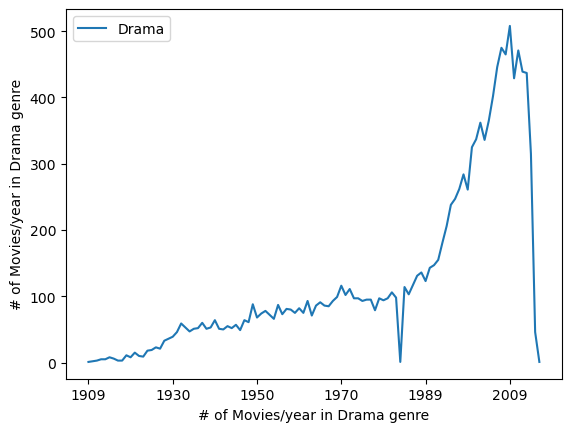

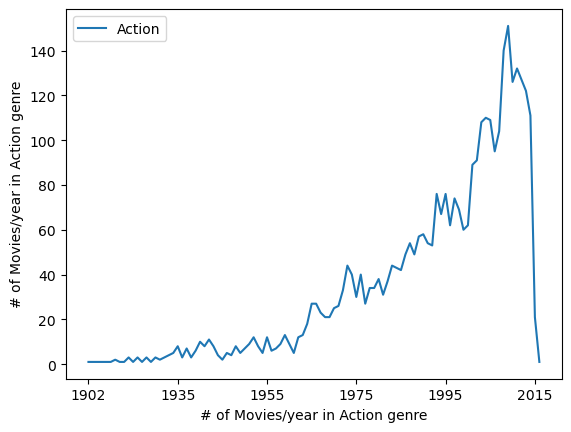

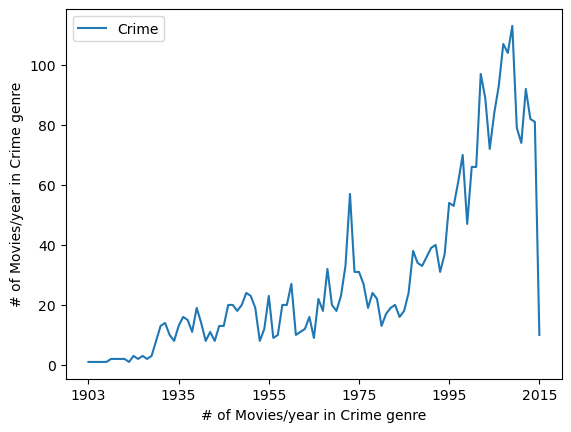

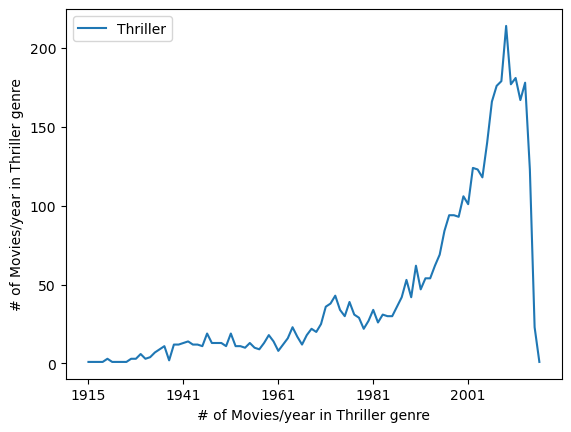

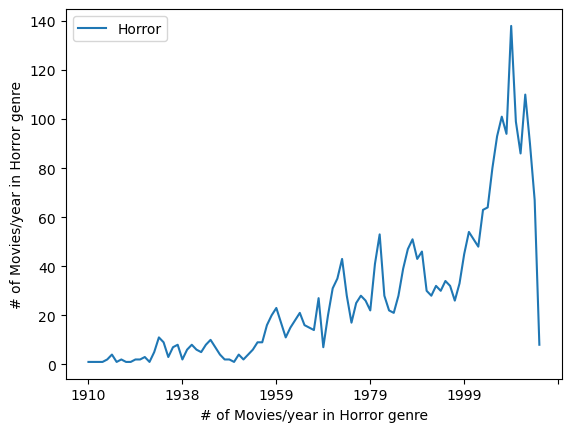

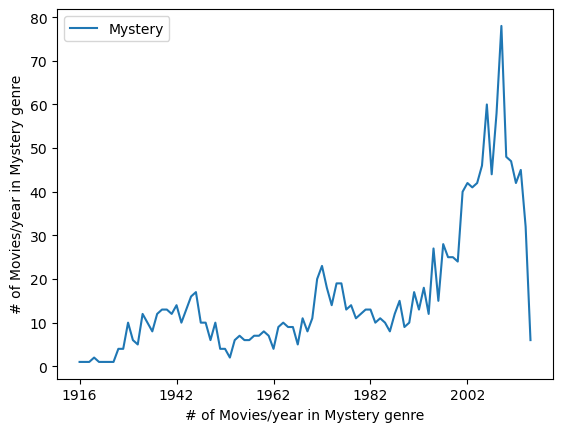

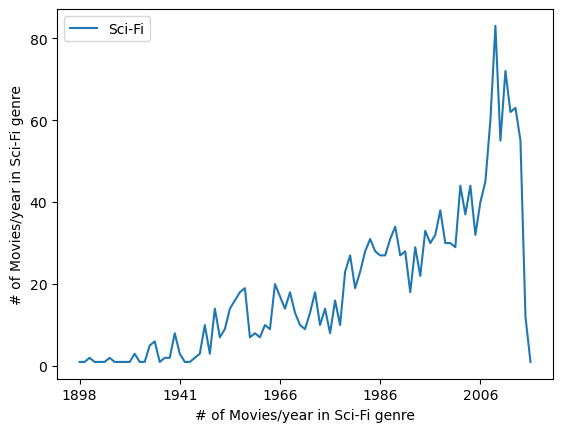

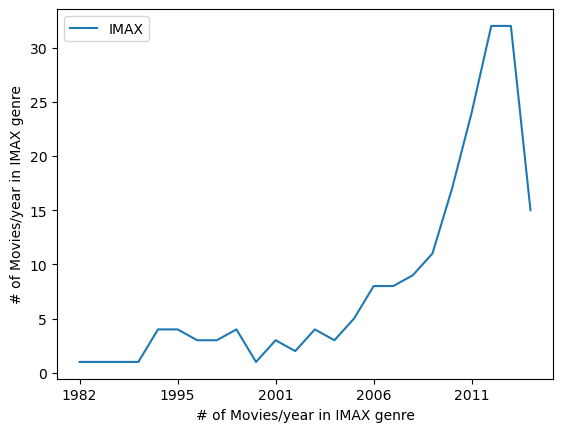

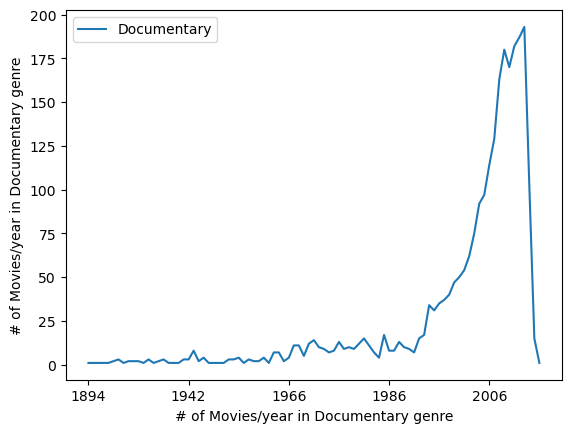

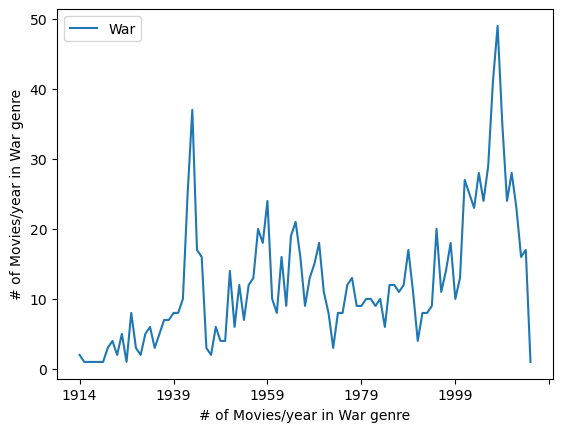

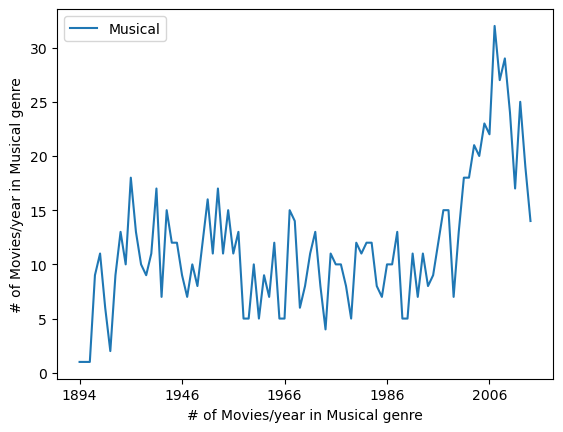

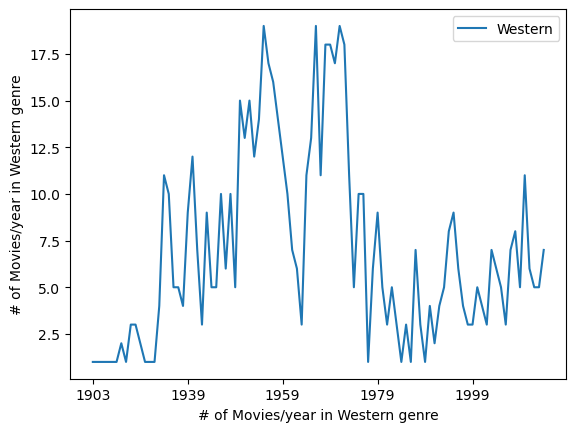

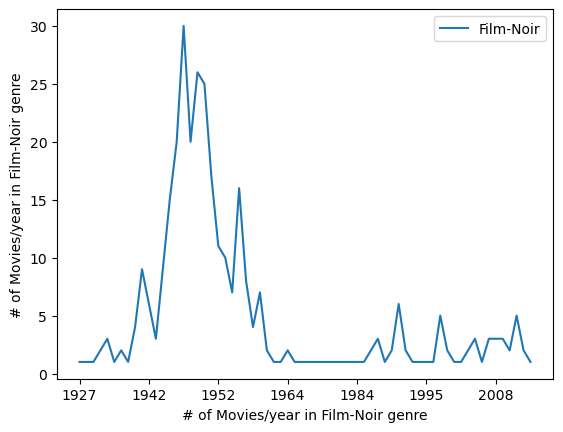

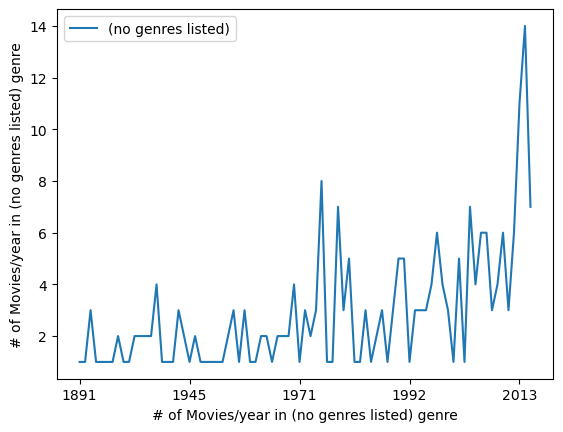

In [42]:
# loop through genre list and plot each genre by how many movies they have that year
for index, row in genres_20m.iterrows():
    # find genres in column that matches current genre in list
    filtered_df = movies_avg_20m[movies_avg_20m['genres'].str.contains(row['genre'], regex=False)]
    # select year and movieId colulmns
    selected_columns = filtered_df[['year', 'movieId']]
    # group data by year column and count the number of movies per year
    grouped_df = selected_columns.groupby('year').count().reset_index()
    # sort data by the year column
    sorted_df = grouped_df.sort_values(by='year')
    
    # plot the data using year column as the x-axis and movieId column as the y-axis
    sorted_df.plot('year', 'movieId', label = row['genre'])
    # set x and y label
    plt.xlabel('# of Movies/year in {} genre'.format(row['genre']))
    plt.ylabel('# of Movies/year in {} genre'.format(row['genre']))
    # set legend
    plt.legend()
    # show plot
    plt.show()

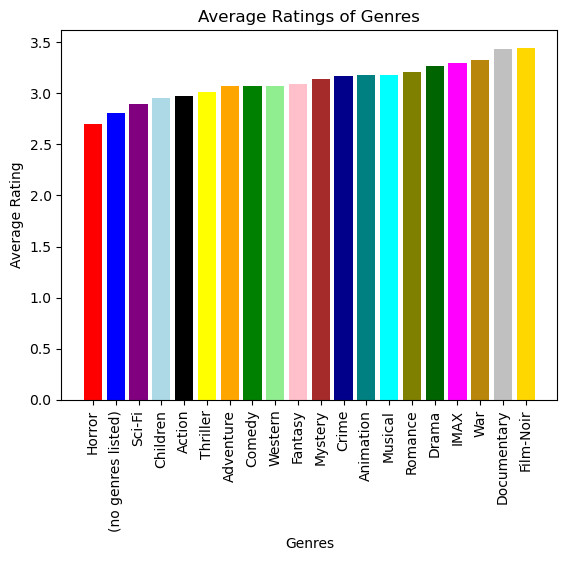

In [43]:
# create list of genres from genre dataframe for for loop
genres_list = []
for index, row in genres_20m.iterrows():
    genres_list.append(row['genre'])

# create average rating list
avg_rating=[]
# loop through list of genres to get average rating for each genre
for genre in genres_list:
    # find movies that fit genre
    filtered_df = movies_avg_20m[movies_avg_20m['genres'].str.contains(genre, regex=False)]
    # get the mean of all ratings for this genre
    average_rating = filtered_df['vote_average'].mean()
    # add to list
    avg_rating.append(average_rating)
    
# add ratings to genre dataframe
genres_20m['rating'] = avg_rating
# sort dataframe by their ratings
df = genres_20m.sort_values(by=['rating'])
df.reset_index(drop=True)

# create list of colors for bar graph
colors = ['red', 'blue', 'purple', 'lightblue', 'black', 'yellow', 'orange', 'green', 'lightgreen', 'pink',
          'brown', 'darkblue', 'teal', 'cyan', 'olive', 'darkgreen', 'magenta', 'darkgoldenrod', 'silver', 'gold']
# plot bar graph, x=genres y=their rating, get colors of bars from list
plt.bar(df['genre'], df['rating'], color = colors)
# rotate x labels to be readable
plt.xticks(rotation=90)
# set x and y labels
plt.xlabel('Genres')
plt.ylabel('Average Rating')
# set title
plt.title('Average Ratings of Genres')
#show bargraph
plt.show()

MovieLens Ratings distribution by Users vs The Movies Dataset Users

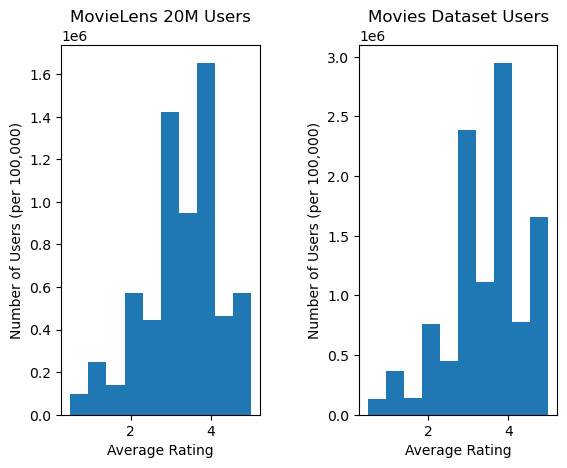

In [44]:
# define suplot as second plot of first row
plt.subplot(121)

# display histogram
plt.hist(movies_usr_20m['rating'])
# Set title 
plt.title("MovieLens 20M Users") 
  
# add X and Y axis labels
plt.xlabel('Average Rating') 
plt.ylabel('Number of Users (per 100,000)')

# define suplot as second plot of first row
plt.subplot(122)

# display histogram
plt.hist(metadata_usr_ratings['rating'])
# Set title 
plt.title("Movies Dataset Users") 
  
# add X and Y axis labels
plt.xlabel('Average Rating') 
plt.ylabel('Number of Users (per 100,000)')


# adjust spacing between subplots
plt.subplots_adjust(wspace=0.5)

# show plot
plt.show()

WordCloud of Words Used in Tags of TMDB dataset

In [45]:
import wordcloud

def wc_df(df,c):
    #intialize list of words
    word_list = []

    # add all words from tags collumn into list
    for index,row in df.iterrows():
        all_words = row[c].split(" ")
        for each in all_words :
            word_list.append(each)

    # get top 100 words and drop first 30, its just words like I and the
    word_count1 = Counter(word_list)
    most_common_names =word_count1.most_common(100)
    most_common_names = most_common_names[33:]

    # plot word cloud
    plt.subplots(figsize = (9,9))
    tags_wc = wordcloud.WordCloud(
            background_color = "white",
            width = 512 ,
            height = 384).generate(" ".join(word_list))
    plt.imshow(tags_wc)
    plt.axis('off')
    plt.show()
    
    return

Best Movies World Cloud:


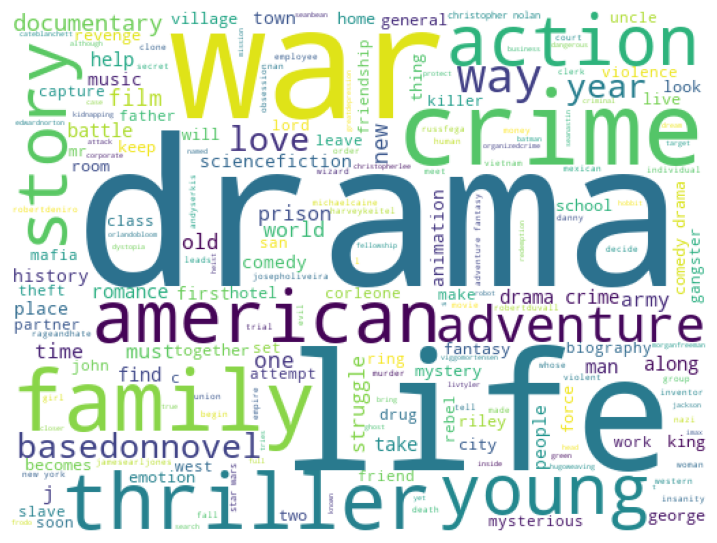

Worst Movies World Cloud:


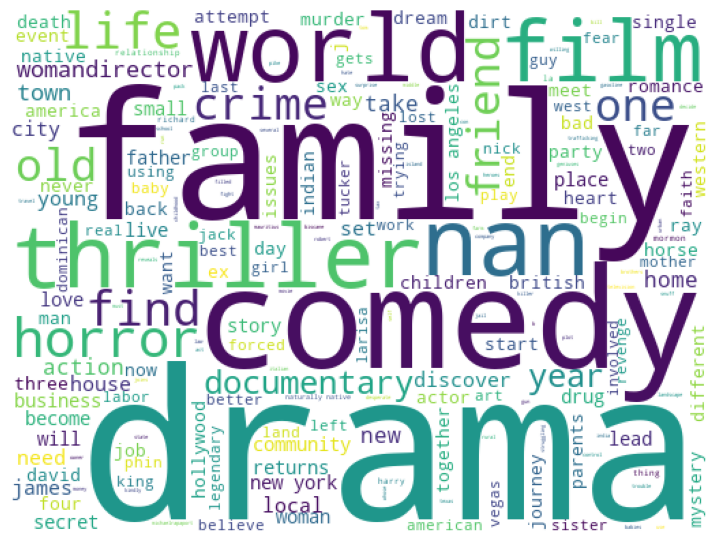

In [46]:
# remove movies with average rating of below 8
print("Best Movies World Cloud:")
best_movies = movies_tags_avg_tmdb[movies_tags_avg_tmdb['vote_average'] >= 8]
wc_df(best_movies, 'tags')

# remove movies with average rating of above 2
print("Worst Movies World Cloud:")
worst_movies = movies_tags_avg_tmdb[movies_tags_avg_tmdb['vote_average'] <= 2]
wc_df(worst_movies, 'tags')


Map of Production Contries

In [47]:
import plotly
import plotly.offline as py

# create choropleth map with plotly from coutry count dataframe
# put dataframe data into dictionary to be referenced by plot
data = [ dict(
        type = 'choropleth',
        locations = metadata_countries['country_name'],
        locationmode = 'country names',
        z = metadata_countries['movies_count'],
        text = metadata_countries['country_name'],
        colorscale = [[0,'rgb(255, 255, 255)'],[1,'rgb(0, 0, 255)']],
        autocolorscale = False,
        reversescale = False,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            tickprefix = '',
            title = 'Number of Movies'),
      ) ]
# create dictionary of the layout of plot(title, projection type)
layout = dict(
    title = 'Foreign Production Countries for the Movies Dataset',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

# Combine data and layout dictionaries into one figure dictionary
fig = dict( data=data, layout=layout )
# display figure dictionary with plotly
py.iplot( fig, validate=False, filename='d3-world-map' )


## Part 6: Machine Learning

**Collabrative Filtering with MovieLens 20M Datset**

Get pivot table and csr matrix

In [48]:
from scipy.sparse import csr_matrix
# function creates pivot table and csr matrix based on dataframe
# parameters: dataframe, strings of column name, index name, and value name
# returns: dataframe pivot table and matrix
def pivot_csr(df,c,i,v):
    # create pivot table from user ratings dataframe
    df_pivot=df.pivot_table(columns=c,index=i,values=v).fillna(0)
    # convert pivot table values into csr matrix
    df_matrix = csr_matrix(df_pivot.values)
    return df_pivot, df_matrix

In [49]:
movies_20m_pivot, movies_20m_matrix = pivot_csr(movies_usr_20m,'userId','title','rating')

**User-Based Collabrative Filtering using KNN**

In [50]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import NearestNeighbors

# function recomends movie from given title using nearest neighbors
# parameters: string movie title
# returns: printed list of recommended movies
def collab_recomender(movie_title, movies_pivot, movies_matrix):
    
    # fit matrix into k nearest neighbors model
    model = NearestNeighbors(metric = "cosine", algorithm="brute")
    model.fit(movies_matrix)

    # search pivot table for given movie title, if it is not in the table, return error
    try:
        movie_index = movies_pivot.index.get_loc(movie_title)
    except KeyError:
        print(f"The movie with title '{movie_title}' was not found.")
        return

    # get 6(given movie + 5) neighbors(movies) that are rating highly by users that also rate the given movie highly
    distances,indices=model.kneighbors(movies_pivot.iloc[movie_index,:].values.reshape(1,-1), n_neighbors=6)

    # print list of movies to be recommended to user
    for i in range(0, len(distances.flatten())):
        if(i==0):
            title = (movies_pivot.index[movie_index])
            print(f"Recommendations for {title}:\n")
        else:
            title = movies_pivot.index[indices.flatten()[i]]
            print(f"{i}: {title}")
    return

Test Recommender 

In [51]:
collab_recomender('Star Wars: Episode IV - A New Hope', movies_20m_pivot, movies_20m_matrix)

Recommendations for Star Wars: Episode IV - A New Hope:

1: Star Wars: Episode V - The Empire Strikes Back
2: Star Wars: Episode VI - Return of the Jedi
3: Raiders of the Lost Ark
4: Back to the Future
5: Matrix, The


In [52]:
collab_recomender('Big Lebowski, The', movies_20m_pivot, movies_20m_matrix)

Recommendations for Big Lebowski, The:

1: Pulp Fiction
2: Fargo
3: Reservoir Dogs
4: American Beauty
5: Fight Club


In [53]:
collab_recomender('Truman Show, The', movies_20m_pivot, movies_20m_matrix)

Recommendations for Truman Show, The:

1: Matrix, The
2: Forrest Gump
3: Back to the Future
4: Pulp Fiction
5: Sixth Sense, The


In [54]:
collab_recomender('Hot Fuzz', movies_20m_pivot, movies_20m_matrix)

Recommendations for Hot Fuzz:

1: Shaun of the Dead
2: Dark Knight, The
3: Iron Man
4: Children of Men
5: Prestige, The


**Content Filtering with TMDB dataset**

Vectorize TMDB data and get Matrix

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer

# function creates vectorized matrix based on dataframe
# parameters: dataframe, strings of column name, string of second column name
# returns: dataframe matrix and list of movie names
def vectorize(df, c, c2):
    # create vectorizer to turn strings into integers
    tfidf_vectorizer = TfidfVectorizer(stop_words='english')
    # turn tags column into vectorized matrix
    df_matrix = tfidf_vectorizer.fit_transform(df[c])
    # get list of elements in movie title column
    df_index = list(df[c2])

    return df_matrix, df_index

In [56]:
# Uses 
tags_matrix, movies_index = vectorize(movies_tags_tmdb, 'tags', 'title')

**Item-Based Content Recommender System using KNN**

In [57]:
# function recomends movie from given title using nearest neighbors
# parameters: string movie title
# returns: printed list of recommended movies
def content_recomender(movie_title, tags_matrix, movies_index):
    # fit matrix into k nearest neighbors model
    model = NearestNeighbors(metric = "cosine", algorithm="brute")
    model.fit(tags_matrix)

     # search matirx for given movie title, if it is not in the table, return error
    try:
        movie_index = movies_index.index(movie_title)
    except ValueError:
        print(f"The movie with title '{movie_title}' was not found.")
        return
    
    # get 6(given movie + 5) neighbors(movies) that are rating highly by users that also rate the given movie highly
    distances,indices=model.kneighbors(tags_matrix.getrow(movie_index), n_neighbors=6)

    # print list of movies to be recommended to user
    for i in range(0, len(distances.flatten())):
        if(i==0):
            title = (movies_index[movie_index])
            print(f"Recommendations for {title}:\n")
        else:
            title = movies_index[indices.flatten()[i]]
            print(f"{i}: {title}")
    return

In [58]:
content_recomender('Star Wars', tags_matrix, movies_index)

Recommendations for Star Wars:

1: The Empire Strikes Back
2: Return of the Jedi
3: Star Wars: Episode III - Revenge of the Sith
4: Star Wars: Episode II - Attack of the Clones
5: Star Wars: Episode I - The Phantom Menace


In [59]:
content_recomender('The Big Lebowski', tags_matrix, movies_index)

Recommendations for The Big Lebowski:

1: The Hudsucker Proxy
2: The Wedding Date
3: King's Ransom
4: Batman Forever
5: O Brother, Where Art Thou?


In [60]:
content_recomender('The Truman Show', tags_matrix, movies_index)

Recommendations for The Truman Show:

1: Nurse Betty
2: Top Five
3: Mr. Popper's Penguins
4: Infamous
5: Rent


In [61]:
content_recomender('Hot Fuzz', tags_matrix, movies_index)

Recommendations for Hot Fuzz:

1: The World's End
2: Shaun of the Dead
3: The Prophecy
4: The Christmas Candle
5: B-Girl


**Collabrative Movie Recommendation with The Movies Dataset**

In [62]:
#Uses same recommender as MovieLens as both recommend based on user reviews in dataset
the_movies_pivot, the_movies_matrix = pivot_csr(metadata_usr_ratings,'userId','title','rating')

In [63]:
collab_recomender('Star Wars', the_movies_pivot, the_movies_matrix)

Recommendations for Star Wars:

1: Aliens vs Predator: Requiem
2: Psycho
3: Night on Earth
4: Big Fish
5: Titanic


In [64]:
collab_recomender('The Big Lebowski', the_movies_pivot, the_movies_matrix)

Recommendations for The Big Lebowski:

1: Dream Wife
2: Macao
3: Terry Pratchett: Choosing to Die
4: Good Morning... and Goodbye!
5: Dreamcatcher


In [65]:
collab_recomender('The Truman Show', the_movies_pivot, the_movies_matrix)

The movie with title 'The Truman Show' was not found.


In [66]:
collab_recomender('Hot Fuzz', the_movies_pivot, the_movies_matrix)

Recommendations for Hot Fuzz:

1: Imagine Me & You
2: The Guardian
3: The Orphanage
4: Just a Question of Love
5: A Tale of Two Cities


**Comparing outputs of Recommender Systems**

With my recommender system I have found a great way to evaluate the datasets with training and test data. Searching the web for how other recommender systems evaluated themselves varied and mostly came down if the results looked right. So I've choosen to see what the recommender returns and evaluating if the movies make sense based on the title given. Not the best evaluation, but the project is doing both Machine Learning and Visulaization and I've ran out of time so that's what I decided. The third dataset seems to be return some results that make sense based, but also a few that are questionable compared to the other recommenders. It working as it should though, this could be just an issue of using the same recommender that works on one dataset and assuming it should work exactly the same as the other dataset.

## Part 8: Conclusion

I enjoyed using this project to combine my passions into one space. It was interesting reseaching and seeing all the possible ways recommender systems work. The data cleaning took so much longer than I thought when beginning this project. Just figuring out how each dataset is structured took a long time look at it over and over. One dataset looked like it was stored as json strings like the second dataset, but it used single quotes instead of double quotes so I had to load it in as a literal eval. Overall each dataset is structured differently and there is no one way to clean them. The machine learning aspect could be used for two out of three of the datasets and the other one only needed minor tweeking. The visualizations took some time too, but the results are worth it. Overall, this project showed me all the aspects that go into data cleaning and what you can do with that data.

Datasets:

1. MovieLens 20M Dataset: https://www.kaggle.com/datasets/grouplens/movielens-20m-dataset
2. TMDB Dataset : https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata
3. The Movies Dataset: https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset